## Demonstration of Continuous Function Approximation

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

The [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) states that a deep neural network with one hidden layer with an arbitrary number of neurons can approximate any well-behaved function. This is demonstrated in the following at the example of approximating a noisy harmonic signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### Definition of Signal

A superposition of two sine waves with different frequencies and normal distributed noise $y = a_0 + a_1 \sin(\Omega_1 x) + a_2 \sin(\Omega_2 x) + n$ is used as signal to be approximated by the model. The features $x$ are drawn from a uniform distribution. Both the features $x$ and the outputs $y$ are normalized.

In [2]:
N = 500  # total number of examples

X = np.random.uniform(size=N, low=-1/2, high=1/2)
Y = 1.75 + np.sin(2*np.pi * X) + 1 * np.sin(3*np.pi * X + 1.5) + .05 * np.random.normal(size=len(X))
Y = Y/np.max(Y)

### Definition and Training of the Model

A deep neural network with one input, one hidden layer with 30 neurons and one output is defined (1-30-1).

In [3]:
# set up the model
inputs = Input(shape=(1,))
z = Dense(30, activation='sigmoid')(inputs)
z = Dense(1, activation='linear')(z)
model = Model(inputs, z)
# compile the model
model.compile(loss="mse", optimizer="adam")

Now the model is trained using the samples from the noisy harmonic signal  

In [4]:
history = model.fit(X, Y, epochs=2000, batch_size=8, verbose=0)

The trained model is used to predict the values of the learned function. The plot shows the examples used to train the model a well as the output of the trained model. The approximation capabilities of the model are clearly observable.

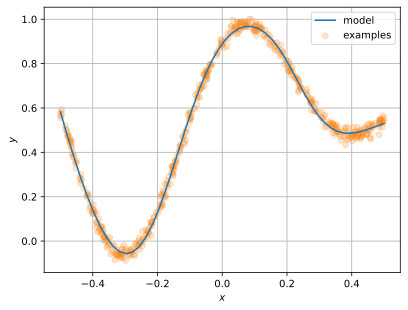

In [5]:
Xp = np.linspace(-1/2, 1/2)
Yp = model.predict(Xp)

plt.plot(Xp, Yp, color='C0', label='model')
plt.scatter(X,Y, alpha=.2, color='C1', label='examples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.